# 4. Writing Structured Programs

1. How can you write well-structured, readable programs that you and others will be able to re-use easily?
2. How do the fundamental building blocks work, such as loops, functions and assignment?
3. What are some of the pitfalls with Python programming and how can you avoid them?


## 4.1   Back to the Basics

### Assignment

In [38]:
foo = 'Monty'
bar = foo
foo = 'Python'
bar
# That is, bar is a copy of foo

'Monty'

In [32]:
foo

'Python'

In [134]:
foo = ['Monty', 'Python']
bar = foo
foo[1] = 'Bodkin'
bar
# just a reference to the object
# the "value" of a structured object such as a list 

['Monty', 'Bodkin']

In [135]:
# bar = foo[:]
# bar

['Monty', 'Bodkin']

In [34]:
foo

['Monty', 'Bodkin']

In [35]:
empty = []
nested = [empty, empty, empty]
nested

[[], [], []]

In [36]:
nested[1].append('Python')
nested

[['Python'], ['Python'], ['Python']]

In [125]:
[id(n) for n in nested]

[4600093768, 4600093768, 4600093768]

In [126]:
nested = [[]] * 3
nested

[[], [], []]

In [127]:
nested[1].append('Python')
nested

[['Python'], ['Python'], ['Python']]

In [9]:
nested[1] = ['Monty']
nested

[['Python'], ['Monty'], ['Python']]

In [128]:
[id(n) for n in nested]

[4680179592, 4680179592, 4680179592]

In [129]:
nested[1].append('Monty')
nested

[['Python', 'Monty'], ['Python', 'Monty'], ['Python', 'Monty']]

### Equality

In [39]:
# 'is' operator tests for object identity

In [130]:
size = 5
python = ['Python']
snake_nest = [python] * size
snake_nest


[['Python'], ['Python'], ['Python'], ['Python'], ['Python']]

In [131]:
snake_nest[0] == snake_nest[1] == snake_nest[2] == snake_nest[3] == snake_nest[4]

True

In [132]:
snake_nest[0] is snake_nest[1] is snake_nest[2] is snake_nest[3] is snake_nest[4]

True

In [42]:
[id(snake) for snake in snake_nest]

[4599965256, 4599965256, 4599965256, 4599965256, 4599965256]

In [43]:
import random
position = random.choice(range(size))
snake_nest[position] = ['Python']
snake_nest

[['Python'], ['Python'], ['Python'], ['Python'], ['Python']]

In [45]:
snake_nest[0] == snake_nest[1] == snake_nest[2] == snake_nest[3] == snake_nest[4]

True

In [46]:
snake_nest[0] is snake_nest[1] is snake_nest[2] is snake_nest[3] is snake_nest[4]

False

In [47]:
[id(snake) for snake in snake_nest]

[4451215304, 4599965256, 4599965256, 4599965256, 4599965256]

### Conditionals 

In [48]:
mixed = ['cat', '', ['dog'], []]
for element in mixed:
    if element:
        print(element)

cat
['dog']


In [49]:
animals = ['cat', 'dog']
if 'cat' in animals:
    print(1)
elif 'dog' in animals: 
    print(2)

# Since the if clause of the statement is satisfied, 
# Python never tries to evaluate the elif clause

1


In [50]:
sent = ['No', 'good', 'fish', 'goes', 'anywhere', 'without', 'a', 'porpoise', '.']
all(len(w) > 4 for w in sent)

False

In [51]:
any(len(w) > 4 for w in sent)

True

## 4.2 Sequences

In [52]:
t = 'walk', 'fem', 3 
t

('walk', 'fem', 3)

In [53]:
t[0]

'walk'

In [54]:
t[1:]

('fem', 3)

In [55]:
len(t)

3

In [56]:
raw = 'I turned off the spectroroute'
text = ['I', 'turned', 'off', 'the', 'spectroroute']
pair = (6, 'turned')
raw[2], text[3], pair[1]

('t', 'the', 'turned')

In [57]:
raw[-3:], text[-3:], pair[-3:]

('ute', ['off', 'the', 'spectroroute'], (6, 'turned'))

In [58]:
len(raw), len(text), len(pair)

(29, 5, 2)

### Operating on Sequence Types

In [136]:
import nltk
raw = 'Red lorry, yellow lorry, red lorry, yellow lorry.'
text = nltk.word_tokenize(raw)
text

['Red',
 'lorry',
 ',',
 'yellow',
 'lorry',
 ',',
 'red',
 'lorry',
 ',',
 'yellow',
 'lorry',
 '.']

In [138]:
fdist = nltk.FreqDist(text)
fdist

FreqDist({',': 3, '.': 1, 'Red': 1, 'lorry': 4, 'red': 1, 'yellow': 2})

In [139]:
sorted(fdist)

[',', '.', 'Red', 'lorry', 'red', 'yellow']

In [60]:
for key in fdist:
    print(key + ':', fdist[key], end='; ')

Red: 1; lorry: 4; ,: 3; yellow: 2; red: 1; .: 1; 

In [61]:
words = ['I', 'turned', 'off', 'the', 'spectroroute']
words[2], words[3], words[4] = words[3], words[4], words[2]
words

['I', 'turned', 'the', 'spectroroute', 'off']

In [62]:
tmp = words[2]
words[2] = words[3]
words[3] = words[4]
words[4] = tmp

In [63]:
words = ['I', 'turned', 'off', 'the', 'spectroroute']
tags = ['noun', 'verb', 'prep', 'det', 'noun']
zip(words, tags)
# lazy evaluation

In [147]:
[w for w, _ in zip(words, tags)]

['I', 'turned', 'off', 'the', 'spectroroute']

In [65]:
list(zip(words, tags))

[('I', 'noun'),
 ('turned', 'verb'),
 ('off', 'prep'),
 ('the', 'det'),
 ('spectroroute', 'noun')]

In [66]:
list(enumerate(words))

[(0, 'I'), (1, 'turned'), (2, 'off'), (3, 'the'), (4, 'spectroroute')]

### Combining Different Sequence Types

In [67]:
words = 'I turned off the spectroroute'.split()
words

['I', 'turned', 'off', 'the', 'spectroroute']

In [68]:
words = 'I turned off the spectroroute'.split(' ')
words

['I', 'turned', 'off', 'the', 'spectroroute']

In [156]:
wordlens = [(len(word), word) for word in words]
wordlens.sort(reverse=True)
wordlens

[(12, 'spectroroute'), (6, 'turned'), (3, 'the'), (3, 'off'), (1, 'I')]

In [157]:
wordlens.sort??

In [70]:
' '.join(w for (_, w) in wordlens)

'I off the turned spectroroute'

In [71]:
lexicon = [
    ('the', 'det', ['Di:', 'D@']),
    ('off', 'prep', ['Qf', 'O:f'])
]

In [72]:
lexicon.sort()
lexicon

[('off', 'prep', ['Qf', 'O:f']), ('the', 'det', ['Di:', 'D@'])]

In [73]:
lexicon[1] = ('turned', 'VBD', ['t3:nd', 't3`nd'])
lexicon

[('off', 'prep', ['Qf', 'O:f']), ('turned', 'VBD', ['t3:nd', 't3`nd'])]

In [74]:
del lexicon[0]
lexicon

[('turned', 'VBD', ['t3:nd', 't3`nd'])]

### Generator Expressions

In [75]:
text = '''"When I use a word," Humpty Dumpty said in rather a scornful tone,
"it means just what I choose it to mean - neither more nor less."'''
[w.lower() for w in nltk.word_tokenize(text)]

['``',
 'when',
 'i',
 'use',
 'a',
 'word',
 ',',
 "''",
 'humpty',
 'dumpty',
 'said',
 'in',
 'rather',
 'a',
 'scornful',
 'tone',
 ',',
 "''",
 'it',
 'means',
 'just',
 'what',
 'i',
 'choose',
 'it',
 'to',
 'mean',
 '-',
 'neither',
 'more',
 'nor',
 'less',
 '.',
 "''"]

In [78]:
max([w.lower() for w in nltk.word_tokenize(text)])

'word'

In [79]:
max(w.lower() for w in nltk.word_tokenize(text))

'word'

In [80]:
min(w.lower() for w in nltk.word_tokenize(text))

"''"

## 4.3 Questions of Style

### Procedural vs Declarative Style

In [77]:
# procedural style (low-level)
tokens = nltk.corpus.brown.words(categories='news')
count = 0
total = 0
for token in tokens:
    count += 1
    total += len(token)
total / count

4.401545438271973

In [78]:
# declarative style (high-level)
total = sum(len(t) for t in tokens)
print (total / len(tokens))

4.401545438271973


In [79]:
# Extreme example
word_list = []
i = 0
while i < len(tokens):
    j = 0
    while j < len(word_list) and word_list[j] <= tokens[i]:
        j += 1
    if j == 0 or tokens[i] != word_list[j-1]:
        word_list.insert(j, tokens[i])
        i += 1
word_list

KeyboardInterrupt: 

In [80]:
word_list = sorted(set(tokens))
word_list

['!',
 '$1',
 '$1,000',
 '$1,000,000,000',
 '$1,500',
 '$1,500,000',
 '$1,600',
 '$1,800',
 '$1.1',
 '$1.4',
 '$1.5',
 '$1.80',
 '$10',
 '$10,000',
 '$10,000-per-year',
 '$100',
 '$100,000',
 '$102,285,000',
 '$109',
 '$11.50',
 '$115,000',
 '$12',
 '$12,192,865',
 '$12,500',
 '$12.50',
 '$12.7',
 '$120',
 '$125',
 '$135',
 '$139.3',
 '$14',
 '$15',
 '$15,000',
 '$15,000,000',
 '$150',
 '$157,460',
 '$16',
 '$16,000',
 '$17',
 '$17,000',
 '$17.8',
 '$172,000',
 '$172,400',
 '$18',
 '$18.2',
 '$18.9',
 '$2',
 '$2,000',
 '$2,170',
 '$2,330,000',
 '$2,700',
 '$2.50',
 '$2.80',
 '$20',
 '$20,000',
 '$20,447,000',
 '$200,000',
 '$214',
 '$22',
 '$22.50',
 '$2400',
 '$25',
 '$25,000',
 '$25-a-plate',
 '$250',
 '$250,000',
 '$251',
 '$253,355,000',
 '$26,000,000',
 '$278,877,000',
 '$28',
 '$28,700,000',
 '$29,000',
 '$3',
 '$3,500',
 '$3,675',
 '$3.5',
 '$30',
 '$300',
 '$300,000,000',
 '$3100',
 '$32,000',
 '$325',
 '$344,000',
 '$37',
 '$37,500',
 '$39,000',
 '$39.5',
 '$4',
 '$4,177.37',


In [75]:
fd = nltk.FreqDist(nltk.corpus.brown.words())
cumulative = 0.0
most_common_words = [word for (word, count) in fd.most_common()]
for rank, word in enumerate(most_common_words):
    cumulative += fd.freq(word)
    print("%3d %6.2f%% %s" % (rank + 1, cumulative * 100, word))
    if cumulative > 0.25:
        break

  1   5.40% the
  2  10.42% ,
  3  14.67% .
  4  17.78% of
  5  20.19% and
  6  22.40% to
  7  24.29% a
  8  25.97% in


In [77]:
text = nltk.corpus.gutenberg.words('milton-paradise.txt')
longest = ''
for word in text:
    if len(word) > len(longest):
        longest = word
longest

'unextinguishable'

In [78]:
maxlen = max(len(word) for word in text)
[word for word in text if len(word) == maxlen]

['unextinguishable',
 'transubstantiate',
 'inextinguishable',
 'incomprehensible']

### Some Legitimate Uses for Counters

In [79]:
sent = ['The', 'dog', 'gave', 'John', 'the', 'newspaper']
n = 3
[sent[i:i+n] for i in range(len(sent)-n+1)]

[['The', 'dog', 'gave'],
 ['dog', 'gave', 'John'],
 ['gave', 'John', 'the'],
 ['John', 'the', 'newspaper']]

In [166]:
m, n = 3, 7
array = [[set() for i in range(n)] for j in range(m)]
array

[[set(), set(), set(), set(), set(), set(), set()],
 [set(), set(), set(), set(), set(), set(), set()],
 [set(), set(), set(), set(), set(), set(), set()]]

In [168]:
import pprint
array[2][5].add('Alice')
pprint.pprint(array)

[[set(), set(), set(), set(), set(), set(), set()],
 [set(), set(), set(), set(), set(), set(), set()],
 [set(), set(), set(), set(), set(), {'Alice'}, set()]]


In [169]:
array = [[set()] * n] * m
array

[[set(), set(), set(), set(), set(), set(), set()],
 [set(), set(), set(), set(), set(), set(), set()],
 [set(), set(), set(), set(), set(), set(), set()]]

In [170]:
array[2][5].add(7)
pprint.pprint(array)

[[{7}, {7}, {7}, {7}, {7}, {7}, {7}],
 [{7}, {7}, {7}, {7}, {7}, {7}, {7}],
 [{7}, {7}, {7}, {7}, {7}, {7}, {7}]]


## 4.4   Functions: The Foundation of Structured Programming

In [81]:
import re
def get_text(file):
    """Read text from a file, normalizing whitespace and stripping HTML markup."""
    text = open(file).read()
    text = re.sub(r'<.*?>', ' ', text)
    text = re.sub('\s+', ' ', text)
    return text

In [82]:
help(get_text)

Help on function get_text in module __main__:

get_text(file)
    Read text from a file, normalizing whitespace and stripping HTML markup.



### Function Inputs and Outputs

In [85]:
def repeat(msg, num):
    return ' '.join([msg] * num)
monty = 'Monty Python'
repeat(monty, 3) 

'Monty Python Monty Python Monty Python'

In [86]:
def monty():
    return "Monty Python"
monty()

'Monty Python'

In [87]:
repeat(monty(), 3)

'Monty Python Monty Python Monty Python'

In [88]:
repeat('Monty Python', 3)

'Monty Python Monty Python Monty Python'

In [89]:
def my_sort1(mylist):      # good: modifies its argument, no return value
    mylist.sort()
def my_sort2(mylist):      # good: doesn't touch its argument, returns value
    return sorted(mylist)
def my_sort3(mylist):      # bad: modifies its argument and also returns it
    mylist.sort()
    return mylist

### Parameter Passing

In [172]:
def set_up(word, properties):
    word = 'lolcat'
    properties.append('noun')
    properties = 5

In [173]:
w = ''
p = []
set_up(w, p)
w

''

In [174]:
p

['noun']

In [93]:
w = ''
word = w
word = 'lolcat'
w

''

In [175]:
p = []
properties = p
properties.append('noun')
type(properties)
properties

['noun']

In [86]:
properties = 5
p
# list is a structured object

['noun']

In [87]:
properties

5

In [88]:
type(properties)

int

### Variable Scope

In [87]:
# LGB rule of name resolution: local, then global, then built-in.

### Checking Parameter Types

In [90]:
def tag(word):
    if word in ['a', 'the', 'all']:
        return 'det'
    else:
        return 'noun'

In [91]:
tag('the')

'det'

In [92]:
tag('knight')

'noun'

In [93]:
tag(["'Tis", 'but', 'a', 'scratch'])

'noun'

In [94]:
tag(['a','the'])

'noun'

If the assert statement fails, it will produce an error that cannot be ignored, since it halts program execution.

In [95]:
def tag(word):
    assert isinstance(word, str), "argument to tag() must be a string"
    if word in ['a', 'the', 'all']:
        return 'det'
    else:
        return 'noun'

In [96]:
tag('the')

'det'

In [97]:
tag(['a','the'])

AssertionError: argument to tag() must be a string

### Functional Decomposition

- data = load_corpus()
- results = analyze(data)
- present(results)

In [95]:
from urllib import request
from bs4 import BeautifulSoup

def freq_words(url, freqdist, n):
    html = request.urlopen(url).read().decode('utf8')
    raw = BeautifulSoup(html).get_text()
    for word in word_tokenize(raw):
        freqdist[word.lower()] += 1
    result = []
    for word, count in freqdist.most_common(n):
        result = result + [word]
    print(result)

In [97]:
# refactored version
from urllib import request
from bs4 import BeautifulSoup

def freq_words(url, n):
    html = request.urlopen(url).read().decode('utf8')
    text = BeautifulSoup(html).get_text()
    freqdist = nltk.FreqDist(word.lower() for word in word_tokenize(text))
    return [word for (word, _) in fd.most_common(n)]

### Documenting Functions

In [99]:
def accuracy(reference, test):
    """
    Calculate the fraction of test items that equal the corresponding reference items.

    Given a list of reference values and a corresponding list of test values,
    return the fraction of corresponding values that are equal.
    In particular, return the fraction of indexes
    {0<i<=len(test)} such that C{test[i] == reference[i]}.

        >>> accuracy(['ADJ', 'N', 'V', 'N'], ['N', 'N', 'V', 'ADJ'])
        0.5

    :param reference: An ordered list of reference values
    :type reference: list
    :param test: A list of values to compare against the corresponding
        reference values
    :type test: list
    :return: the accuracy score
    :rtype: float
    :raises ValueError: If reference and length do not have the same length
    """

    if len(reference) != len(test):
        raise ValueError("Lists must have the same length.")
    num_correct = 0
    for x, y in zip(reference, test):
        if x == y:
            num_correct += 1
    return float(num_correct) / len(reference)

## 4.5 Doing More with Functions

### Functions as Arguments

In [98]:
sent = ['Take', 'care', 'of', 'the', 'sense', ',', 'and', 'the',
        'sounds', 'will', 'take', 'care', 'of', 'themselves', '.']
def extract_property(func):
    return [func(word) for word in sent]
extract_property(len)

[4, 4, 2, 3, 5, 1, 3, 3, 6, 4, 4, 4, 2, 10, 1]

In [99]:
def last_letter(word):
    return word[-1]
extract_property(last_letter)

# --> [last_letter(word) for word in sent]

['e', 'e', 'f', 'e', 'e', ',', 'd', 'e', 's', 'l', 'e', 'e', 'f', 's', '.']

In [107]:
extract_property(lambda w: w[-1])


['e', 'e', 'f', 'e', 'e', ',', 'd', 'e', 's', 'l', 'e', 'e', 'f', 's', '.']

In [178]:
list(map(lambda w: w[-1], sent))

['e', 'e', 'f', 'e', 'e', ',', 'd', 'e', 's', 'l', 'e', 'e', 'f', 's', '.']

In [10]:
sorted(sent)

[',',
 '.',
 'Take',
 'and',
 'care',
 'care',
 'of',
 'of',
 'sense',
 'sounds',
 'take',
 'the',
 'the',
 'themselves',
 'will']

In [100]:
# sorted(sent, lambda x, y: cmp(len(y), len(x)))

### Accumulative Functions

In [2]:
def search1(substring, words):
    result = []
    for word in words:
        if substring in word:
            result.append(word)
    return result

def search2(substring, words):
    for word in words:
        if substring in word:
            yield word

In [4]:
for item in search1('zz', nltk.corpus.brown.words()):
    print(item, end=" ")

Grizzlies' fizzled Rizzuto huzzahs dazzler jazz Pezza Pezza Pezza embezzling embezzlement pizza jazz Ozzie nozzle drizzly puzzle puzzle dazzling Sizzling guzzle puzzles dazzling jazz jazz Jazz jazz Jazz jazz jazz Jazz jazz jazz jazz Jazz jazz dizzy jazz Jazz puzzler jazz jazzmen jazz jazz Jazz Jazz Jazz jazz Jazz jazz jazz jazz Jazz jazz jazz jazz jazz jazz jazz jazz jazz jazz Jazz Jazz jazz jazz nozzles nozzle puzzle buzz puzzle blizzard blizzard sizzling puzzled puzzle puzzle muzzle muzzle muezzin blizzard Neo-Jazz jazz muzzle piazzas puzzles puzzles embezzle buzzed snazzy buzzes puzzled puzzled muzzle whizzing jazz Belshazzar Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie's Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie blizzard blizzards blizzard blizzard fuzzy Lazzeri Piazza piazza palazzi Piazza Piazza Palazzo Palazzo Palazzo Piazza Piazza Palazzo palazzo palazzo Palazzo Palazzo Piazza piazza piazza piazza Piazza Piazza Palazzo palazzo Piazza piazz

In [5]:
for item in search2('zz', nltk.corpus.brown.words()):
    print(item, end=" ")

Grizzlies' fizzled Rizzuto huzzahs dazzler jazz Pezza Pezza Pezza embezzling embezzlement pizza jazz Ozzie nozzle drizzly puzzle puzzle dazzling Sizzling guzzle puzzles dazzling jazz jazz Jazz jazz Jazz jazz jazz Jazz jazz jazz jazz Jazz jazz dizzy jazz Jazz puzzler jazz jazzmen jazz jazz Jazz Jazz Jazz jazz Jazz jazz jazz jazz Jazz jazz jazz jazz jazz jazz jazz jazz jazz jazz Jazz Jazz jazz jazz nozzles nozzle puzzle buzz puzzle blizzard blizzard sizzling puzzled puzzle puzzle muzzle muzzle muezzin blizzard Neo-Jazz jazz muzzle piazzas puzzles puzzles embezzle buzzed snazzy buzzes puzzled puzzled muzzle whizzing jazz Belshazzar Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie's Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie blizzard blizzards blizzard blizzard fuzzy Lazzeri Piazza piazza palazzi Piazza Piazza Palazzo Palazzo Palazzo Piazza Piazza Palazzo palazzo palazzo Palazzo Palazzo Piazza piazza piazza piazza Piazza Piazza Palazzo palazzo Piazza piazz

yield statememt approach is typically more efficent

function only generates the data as it is required by the calling program, and does not need to allocate additional memory to store the output

In [7]:
def permutations(seq):
    if len(seq) <= 1:
        yield seq
    else:
        for perm in permutations(seq[1:]):
            for i in range(len(perm)+1):
                yield perm[:i] + seq[0:1] + perm[i:]
list(permutations(['police', 'fish', 'buffalo']))

[['police', 'fish', 'buffalo'],
 ['fish', 'police', 'buffalo'],
 ['fish', 'buffalo', 'police'],
 ['police', 'buffalo', 'fish'],
 ['buffalo', 'police', 'fish'],
 ['buffalo', 'fish', 'police']]

### Higher-Order Functions

Python provides some higher-order functions that are standard features of functional programming languages such as Haskell

In [101]:
def is_content_word(word):
    return word.lower() not in ['a', 'of', 'the', 'and', 'will', ',', '.']

sent = ['Take', 'care', 'of', 'the', 'sense', ',', 'and', 'the',
'sounds', 'will', 'take', 'care', 'of', 'themselves', '.']

In [102]:
list(filter(is_content_word, sent))

['Take', 'care', 'sense', 'sounds', 'take', 'care', 'themselves']

In [103]:
[w for w in sent if is_content_word(w)]

['Take', 'care', 'sense', 'sounds', 'take', 'care', 'themselves']

In [104]:
lengths = list(map(len, nltk.corpus.brown.sents(categories='news')))
sum(lengths) / len(lengths)

21.75081116158339

In [105]:
lengths = [len(sent) for sent in nltk.corpus.brown.sents(categories='news')]
sum(lengths) / len(lengths)

21.75081116158339

In [106]:
list(map(lambda w: len(list(filter(lambda c: c.lower() in "aeiou", w))), sent))

[2, 2, 1, 1, 2, 0, 1, 1, 2, 1, 2, 2, 1, 3, 0]

In [107]:
[len(list(c for c in w if c.lower() in "aeiou")) for w in sent]

[2, 2, 1, 1, 2, 0, 1, 1, 2, 1, 2, 2, 1, 3, 0]

### Named Arguments

In [23]:
def repeat(msg='<empty>', num=1):
    return msg * num
repeat(num=3)

'<empty><empty><empty>'

In [24]:
repeat(msg='Alice')

'Alice'

In [25]:
repeat(num=5, msg='Alice')

'AliceAliceAliceAliceAlice'

*args: in-place dictionary

**kwargs: keyword argument

In [109]:
def generic(*args, **kwargs):
    print(args)
    print(kwargs)
generic(1, "African swallow", monty="python")

(1, 'African swallow')
{'monty': 'python'}


In [110]:
generic(1, "African swallow")

(1, 'African swallow')
{}


In [112]:
generic(monty="African swallow")

()
{'monty': 'African swallow'}


In [27]:
song = [['four', 'calling', 'birds'],
    ['three', 'French', 'hens'],
    ['two', 'turtle', 'doves']]
list(zip(song[0], song[1], song[2]))

[('four', 'three', 'two'),
 ('calling', 'French', 'turtle'),
 ('birds', 'hens', 'doves')]

In [28]:
list(zip(*song))

[('four', 'three', 'two'),
 ('calling', 'French', 'turtle'),
 ('birds', 'hens', 'doves')]

In [6]:
def freq_words(file, min=1, num=10):
    text = open(file).read()
    tokens = nltk.word_tokenize(text)
    freqdist = nltk.FreqDist(t for t in tokens if len(t) >= min)
    return freqdist.most_common(num)

In [8]:
fw = freq_words('sample.txt', 4, 10)
fw

[('York', 11),
 ('Times', 10),
 ('paper', 4),
 ('circulation', 4),
 ('newspaper', 3),
 ('since', 3),
 ('page', 3),
 ('sections', 3),
 ('daily', 2),
 ('Company', 2)]

In [9]:
fw = freq_words('sample.txt', min=4, num=10)
fw

[('York', 11),
 ('Times', 10),
 ('paper', 4),
 ('circulation', 4),
 ('newspaper', 3),
 ('since', 3),
 ('page', 3),
 ('sections', 3),
 ('daily', 2),
 ('Company', 2)]

In [10]:
fw = freq_words('sample.txt', num=10, min=4)
fw

[('York', 11),
 ('Times', 10),
 ('paper', 4),
 ('circulation', 4),
 ('newspaper', 3),
 ('since', 3),
 ('page', 3),
 ('sections', 3),
 ('daily', 2),
 ('Company', 2)]

In [15]:
def freq_words(file, min=1, num=10, verbose=False):
    freqdist = nltk.FreqDist()
    if verbose: print("Opening", file)
    text = open(file).read()
    if verbose: print("Read in %d characters" % len(file))
    for word in nltk.word_tokenize(text):
        if len(word) >= min:
            freqdist[word] += 1
            if verbose and freqdist.N() % 100 == 0: print(".", sep="")
    if verbose: print
    return freqdist.most_common(num)

In [16]:
fw = freq_words('sample.txt', 4, 10)
fw

[('York', 11),
 ('Times', 10),
 ('paper', 4),
 ('circulation', 4),
 ('newspaper', 3),
 ('since', 3),
 ('page', 3),
 ('sections', 3),
 ('daily', 2),
 ('Company', 2)]

In [113]:
fw = freq_words('sample.txt', 4, 10, True)
fw

Opening sample.txt
Read in 10 characters
.


[('York', 11),
 ('Times', 10),
 ('paper', 4),
 ('circulation', 4),
 ('newspaper', 3),
 ('since', 3),
 ('page', 3),
 ('sections', 3),
 ('daily', 2),
 ('Company', 2)]

## 4.6   Program Development

### Structure of a Python Module

In [115]:
nltk.translate.metrics.distance.__file__

AttributeError: module 'nltk.translate.metrics' has no attribute 'distance'

### Multi-Module Programs

### Sources of Error

In [22]:
def find_words(text, wordlength, result=[]):
    for word in text:
        if len(word) == wordlength:
            result.append(word)
    return result
find_words(['omg', 'teh', 'lolcat', 'sitted', 'on', 'teh', 'mat'], 3)

['omg', 'teh', 'teh', 'mat']

In [23]:
find_words(['omg', 'teh', 'lolcat', 'sitted', 'on', 'teh', 'mat'], 2, ['ur'])

['ur', 'on']

In [24]:
find_words(['omg', 'teh', 'lolcat', 'sitted', 'on', 'teh', 'mat'], 3)

['omg', 'teh', 'teh', 'mat', 'omg', 'teh', 'teh', 'mat']

### Debugging Techiniques

- check your assumptions
- adding "print" statement to the program

In [19]:
import pdb
import mymodule
pdb.run('mymodule.myfuctions()')

ModuleNotFoundError: No module named 'mymodule'

In [ ]:
>>> import pdb
>>> find_words(['cat'], 3) # [_first-run]
['cat']
>>> pdb.run("find_words(['dog'], 3)") # [_second-run]
> <string>(1)<module>()
(Pdb) step
--Call--
> <stdin>(1)find_words()
(Pdb) args
text = ['dog']
wordlength = 3
result = ['cat']

### Defensive Programming

In [ ]:
# e.g. assert(isinstance(text, list))

## 4.7   Algorithm Design

In [25]:
# The best known strategy is known as divide-and-conquer.

### Recursion

In [32]:
def factorial1(n):
    result = 1
    for i in range(n):
        result *= (i+1)
    return result

In [33]:
def factorial2(n):
    if n == 1:
        return 1
    else:
        return n * factorial2(n-1)

In [ ]:
# 10 * factorial2(9)
# 10 * 9 * factorial2(8)

In [34]:
factorial1(10)

3628800

In [35]:
factorial2(10)

3628800

In [116]:
def size1(s):
    return 1 + sum(size1(child) for child in s.hyponyms())

In [117]:
def size2(s):
    layer = [s]
    total = 0
    while layer:
        total += len(layer)
        layer = [h for c in layer for h in c.hyponyms()]
    return total

In [118]:
from nltk.corpus import wordnet as wn
dog = wn.synset('dog.n.01')
size1(dog)

190

In [119]:
size2(dog)

190

In [44]:
def insert(trie, key, value):
    if key:
        first, rest = key[0], key[1:]
        if first not in trie:
            trie[first] = {}
        insert(trie[first], rest, value)
    else:
        trie['value'] = value

In [48]:
trie = {}
insert(trie, 'chat', 'cat')
pprint.pprint(trie)

{'c': {'h': {'a': {'t': {'value': 'cat'}}}}}


In [49]:
insert(trie, 'chien', 'dog')
pprint.pprint(trie)

{'c': {'h': {'a': {'t': {'value': 'cat'}},
             'i': {'e': {'n': {'value': 'dog'}}}}}}


In [50]:
insert(trie, 'chair', 'flesh')
pprint.pprint(trie)

{'c': {'h': {'a': {'i': {'r': {'value': 'flesh'}}, 't': {'value': 'cat'}},
             'i': {'e': {'n': {'value': 'dog'}}}}}}


In [51]:
insert(trie, 'chic', 'stylish')
pprint.pprint(trie)

{'c': {'h': {'a': {'i': {'r': {'value': 'flesh'}}, 't': {'value': 'cat'}},
             'i': {'c': {'value': 'stylish'}, 'e': {'n': {'value': 'dog'}}}}}}


In [52]:
trie = dict(trie) # for nicer printing
trie

{'c': {'h': {'a': {'i': {'r': {'value': 'flesh'}}, 't': {'value': 'cat'}},
   'i': {'c': {'value': 'stylish'}, 'e': {'n': {'value': 'dog'}}}}}}

In [53]:
trie['c']['h']['a']['t']['value']

'cat'

In [54]:
pprint.pprint(trie, width=40)

{'c': {'h': {'a': {'i': {'r': {'value': 'flesh'}},
                   't': {'value': 'cat'}},
             'i': {'c': {'value': 'stylish'},
                   'e': {'n': {'value': 'dog'}}}}}}


### Space-Time Tradeoffs

We can sometimes significantly speed up the execution of a program by building an auxiliary data structure, such as an index.

In [56]:
import re 
def raw(file):
    contents = open(file).read()
    contents = re.sub(r'<.*?>', ' ', contents)
    contents = re.sub('\s+', ' ', contents)
    return contents

def snippet(doc, term):
    text = ' '*30 + raw(doc) + ' '*30
    pos = text.index(term)
    return text[pos-30:pos+30]

print("Building Index...")
files = nltk.corpus.movie_reviews.abspaths()
idx = nltk.Index((w, f) for f in files for w in raw(f).split())

query = ''
while query != "quit":
    query = input("query> ")     # use raw_input() in Python 2
    if query in idx:
        for doc in idx[query]:
            print(snippet(doc, query))
    else:
        print("Not found")

Building Index...
query> news
got a negative review . daily news ? negative . reelviews ? 
alter matthau coached the bad news bears ? nineteen years an
alter matthau coached the bad news bears ? nineteen years an
 seagal in under siege ? a tv newswoman , diana ( gabrielle 
ter of months , she's a cable news personality . so there sh
as an assistant to a big-time news reporter . she'd like to 
gative reporter for the local news who's out to prove himsel
leoni plays a ( rather crap ) news reporter , jenny lerner ,
d . be very afraid . the good news is that sandler doesn't a
to herself . it's not all bad news . flubber is a green jell
 a lost art . now for the bad news . worst and most unforgiv
a different story : it is old news . the love story between 
p by throwing in more satiric news coverage , but the faux-j
 current " hot topic " in the news ) in its storyline , whic
r . when he brings this first news of the war in years to hi
r . when he brings this first news of the war in years 

KeyboardInterrupt: 

In [120]:
def preprocess(tagged_corpus):
    words = set()
    tags = set()
    for sent in tagged_corpus:
        for word, tag in sent:
            words.add(word)
            tags.add(tag)
    wm = dict((w, i) for (i, w) in enumerate(words))
    tm = dict((t, i) for (i, t) in enumerate(tags))
    return [[(wm[w], tm[t]) for (w, t) in sent] for sent in tagged_corpus]

In [121]:
from timeit import Timer
vocab_size = 100000
setup_list = "import random; vocab = range(%d)" % vocab_size
setup_set = "import random; vocab = set(range(%d))" % vocab_size
statement = "random.randint(0, %d) in vocab" % (vocab_size * 2)

In [122]:
print(Timer(statement, setup_list).timeit(1000))

0.0020250399993528845


In [123]:
print(Timer(statement, setup_set).timeit(1000))

0.0017487010009062942


### Dynamic Programming

Dynamic programming is a general technique for designing algorithms which is widely used in natural language processing. The term 'programming' is used in a different sense to what you might expect, to mean planning or scheduling.

In [63]:
def virahanka1(n):
    if n == 0:
        return [""]
    elif n == 1:
        return ["S"]
    else:
        s = ["S" + prosody for prosody in virahanka1(n-1)]
        l = ["L" + prosody for prosody in virahanka1(n-2)]
        return s + l

def virahanka2(n):
    lookup = [[""], ["S"]]
    for i in range(n-1):
        s = ["S" + prosody for prosody in lookup[i+1]]
        l = ["L" + prosody for prosody in lookup[i]]
        lookup.append(s + l)
    return lookup[n]

def virahanka3(n, lookup={0:[""], 1:["S"]}):
    if n not in lookup:
        s = ["S" + prosody for prosody in virahanka3(n-1)]
        l = ["L" + prosody for prosody in virahanka3(n-2)]
        lookup[n] = s + l
    return lookup[n]

from nltk import memoize
@memoize
def virahanka4(n):
    if n == 0:
        return [""]
    elif n == 1:
        return ["S"]
    else:
        s = ["S" + prosody for prosody in virahanka4(n-1)]
        l = ["L" + prosody for prosody in virahanka4(n-2)]
        return s + l

In [64]:
virahanka1(4)

['SSSS', 'SSL', 'SLS', 'LSS', 'LL']

In [65]:
virahanka2(4)

['SSSS', 'SSL', 'SLS', 'LSS', 'LL']

In [66]:
virahanka3(4)

['SSSS', 'SSL', 'SLS', 'LSS', 'LL']

In [67]:
virahanka4(4)

['SSSS', 'SSL', 'SLS', 'LSS', 'LL']

## 4.8   A Sample of Python Libraries

### Matplotlib

In [68]:
from numpy import arange
from matplotlib import pyplot

colors = 'rgbcmyk' # red, green, blue, cyan, magenta, yellow, black

def bar_chart(categories, words, counts):
    "Plot a bar chart showing counts for each word by category"
    ind = arange(len(words))
    width = 1 / (len(categories) + 1)
    bar_groups = []
    for c in range(len(categories)):
        bars = pyplot.bar(ind+c*width, counts[categories[c]], width,
                         color=colors[c % len(colors)])
        bar_groups.append(bars)
    pyplot.xticks(ind+width, words)
    pyplot.legend([b[0] for b in bar_groups], categories, loc='upper left')
    pyplot.ylabel('Frequency')
    pyplot.title('Frequency of Six Modal Verbs by Genre')
    pyplot.show()

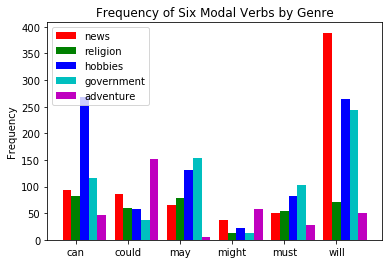

In [69]:
genres = ['news', 'religion', 'hobbies', 'government', 'adventure']
modals = ['can', 'could', 'may', 'might', 'must', 'will']
cfdist = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in genres
    for word in nltk.corpus.brown.words(categories=genre)
    if word in modals)

counts = {}
for genre in genres:
    counts[genre] = [cfdist[genre][word] for word in modals]
bar_chart(genres, modals, counts)

In [70]:
from matplotlib import use, pyplot
use('Agg')
pyplot.savefig('modals.png')
print('Content-Type: text/html')
print()
print('<html><body>')
print('<img src="modals.png"/>')
print('</body></html>')

Content-Type: text/html

<html><body>
<img src="modals.png"/>
</body></html>


/Users/jinhan/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


### NetworkX

In [74]:
import networkx as nx
import matplotlib
from nltk.corpus import wordnet as wn

def traverse(graph, start, node):
    graph.depth[node.name] = node.shortest_path_distance(start)
    for child in node.hyponyms():
        graph.add_edge(node.name, child.name)
        traverse(graph, start, child)

def hyponym_graph(start):
    G = nx.Graph()
    G.depth = {}
    traverse(G, start, start)
    return G

def graph_draw(graph):
    nx.draw_graphviz(graph,
         node_size = [16 * graph.degree(n) for n in graph],
         node_color = [graph.depth[n] for n in graph],
         with_labels = False)
    matplotlib.pyplot.show()

In [75]:
dog = wn.synset('dog.n.01')
graph = hyponym_graph(dog)
graph_draw(graph)

AttributeError: module 'networkx.drawing' has no attribute 'graphviz_layout'